In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Base directory for the dataset in Google Drive
base_dir = '/content/drive/MyDrive/aer 850/project 2/Data/'

# Paths to train, validation, and test directories
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Check if paths are correct
print("Training Directory:", train_dir)
print("Validation Directory:", valid_dir)
print("Testing Directory:", test_dir)



Training Directory: /content/drive/MyDrive/aer 850/project 2/Data/train
Validation Directory: /content/drive/MyDrive/aer 850/project 2/Data/valid
Testing Directory: /content/drive/MyDrive/aer 850/project 2/Data/test


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 3.1: Create a data generator for the training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    shear_range=0.3,    # Apply random shear transformations
    zoom_range=0.2,     # Apply random zoom transformations
    horizontal_flip=True  # Randomly flip images horizontally
)

# Check that the training data generator is created
print("Training data generator created!")


Training data generator created!


In [5]:
# Step 4.1: Create a data generator for the validation data (only rescaling)
valid_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Step 4.2: Create a data generator for the test data (only rescaling)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Check that the validation and test data generators are created
print("Validation and test data generators created!")


Validation and test data generators created!


In [6]:
# Step 5.1: Link the training data generator to the train directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize all images to 500x500
    batch_size=32,          # Number of images to process in one batch
    class_mode='categorical'  # Multi-class classification
)


Found 1942 images belonging to 3 classes.


In [7]:
# Step 6.1: Link the validation data generator to the validation directory
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(128, 128),  # Resize all images to 500x500
    batch_size=32,          # Number of images to process in one batch
    class_mode='categorical'  # Multi-class classification
)

# Step 6.2: Link the test data generator to the test directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  # Resize all images to 500x500
    batch_size=32,          # Number of images to process in one batch
    class_mode='categorical'  # Multi-class classification
)


Found 431 images belonging to 3 classes.
Found 539 images belonging to 3 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [9]:
# Step 2: Initialize the Sequential model
model = Sequential()

# Print a message to confirm the model is initialized
print("CNN model initialized!")


CNN model initialized!


In [10]:
from tensorflow.keras.layers import Input

# Step 3 (Revised): Start with an Input layer
model = Sequential([
    Input(shape=(128, 128, 3)),  # Define the input shape for the model
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu')  # First Conv2D layer
])

# Print a message to confirm the first layer setup
print("First Conv2D layer added with Input layer!")


First Conv2D layer added with Input layer!


In [11]:
# Step 4: Add the first pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Print a message to confirm the layer is added
print("First MaxPooling2D layer added!")


First MaxPooling2D layer added!


In [12]:
# Step 5.1: Add a second convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Step 5.2: Add a second pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Print a message to confirm the layers are added
print("Second Conv2D and MaxPooling2D layers added!")


Second Conv2D and MaxPooling2D layers added!


In [13]:
# Step 6: Flatten the feature maps
model.add(Flatten())

# Print a message to confirm the layer is added
print("Flatten layer added!")


Flatten layer added!


In [14]:
# Step 7.1: Add a hidden Dense layer
model.add(Dense(units=128, activation='relu'))

# Step 7.2: Add a Dropout layer to prevent overfitting
model.add(Dropout(rate=0.6)) # Randomly deactivate 50% of neurons during training

# Step 7.3: Add the output Dense layer
model.add(Dense(units=3, activation='softmax'))  # 3 neurons for 3 classes

# Print a message to confirm the Dense layers are added
print("Dense layers added!")


Dense layers added!


In [15]:
from tensorflow.keras.optimizers import Adam

# Step 8: Compile the model with a reduced learning rate
model.compile(
    optimizer=Adam(learning_rate=0.0005),  # Reduced learning rate
    loss='categorical_crossentropy',        # Loss function: For multi-class classification
    metrics=['accuracy']                    # Metric: Track accuracy during training
)

# Print a message to confirm the model is compiled
print("Model compiled successfully with reduced learning rate!")

Model compiled successfully with reduced learning rate!


In [16]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',         # Monitor validation loss
    patience=5,                 # Stop if no improvement for 3 consecutive epochs
    restore_best_weights=True   # Restore the best model weights
)

# Train the model with early stopping
history = model.fit(
    train_generator,
    epochs=25,                     # Train for up to 20 epochs
    validation_data=valid_generator,
    callbacks=[early_stopping],    # Add early stopping
    verbose=1                      # Display progress
)

print("Model training complete!")


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 737s 11s/step - accuracy: 0.3741 - loss: 1.6257 - val_accuracy: 0.6311 - val_loss: 0.8926
Epoch 2/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.6147 - loss: 0.8700 - val_accuracy: 0.6659 - val_loss: 0.7637
Epoch 3/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6728 - loss: 0.7266 - val_accuracy: 0.6821 - val_loss: 0.6968
Epoch 4/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7124 - loss: 0.6910 - val_accuracy: 0.6613 - val_loss: 0.7250
Epoch 5/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.7160 - loss: 0.6486 - val_accuracy: 0.6891 - val_loss: 0.6810
Epoch 6/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.7171 - loss: 0.6278 - val_accuracy: 0.7146 - val_loss: 0.6886
Epoch 7/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.7231 - loss: 0.6085 - val_accuracy: 0.6984 - val_loss: 0.6494
Epoch 8/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7335 - loss: 0.6036 - val_accuracy: 0.6984 - val_loss: 0.7027
E

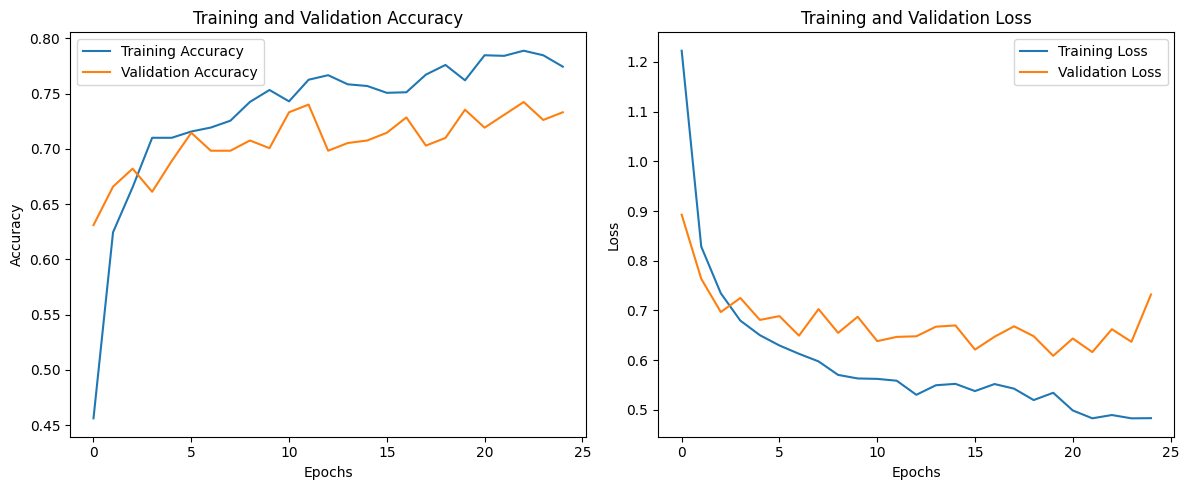

In [17]:
import matplotlib.pyplot as plt

# Step 10: Plot training and validation accuracy
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [18]:
# Step 5.1: Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)

# Print the test results
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 229s 14s/step - accuracy: 0.7392 - loss: 0.6631
Test Accuracy: 0.73
Test Loss: 0.69


In [19]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

# Step 1.1: Specify the path to a single test image
image_path = '/content/drive/MyDrive/aer 850/project 2/Data/test/crack/IMG_20230511_102354_jpg.rf.fcbba70844566e28f4920a3619857542.jpg'  # Update with a real test image path

# Step 1.2: Load the image
image = load_img(image_path, target_size=(500, 500))  # Resize to match model input size

# Step 1.3: Convert the image to an array
image_array = img_to_array(image)

# Step 1.4: Normalize the image
image_array = image_array / 255.0  # Rescale pixel values to [0, 1]

# Step 1.5: Add a batch dimension (required for model prediction)
image_array = np.expand_dims(image_array, axis=0)

# Print the shape of the processed image to verify
print("Processed image shape:", image_array.shape)


Processed image shape: (1, 500, 500, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


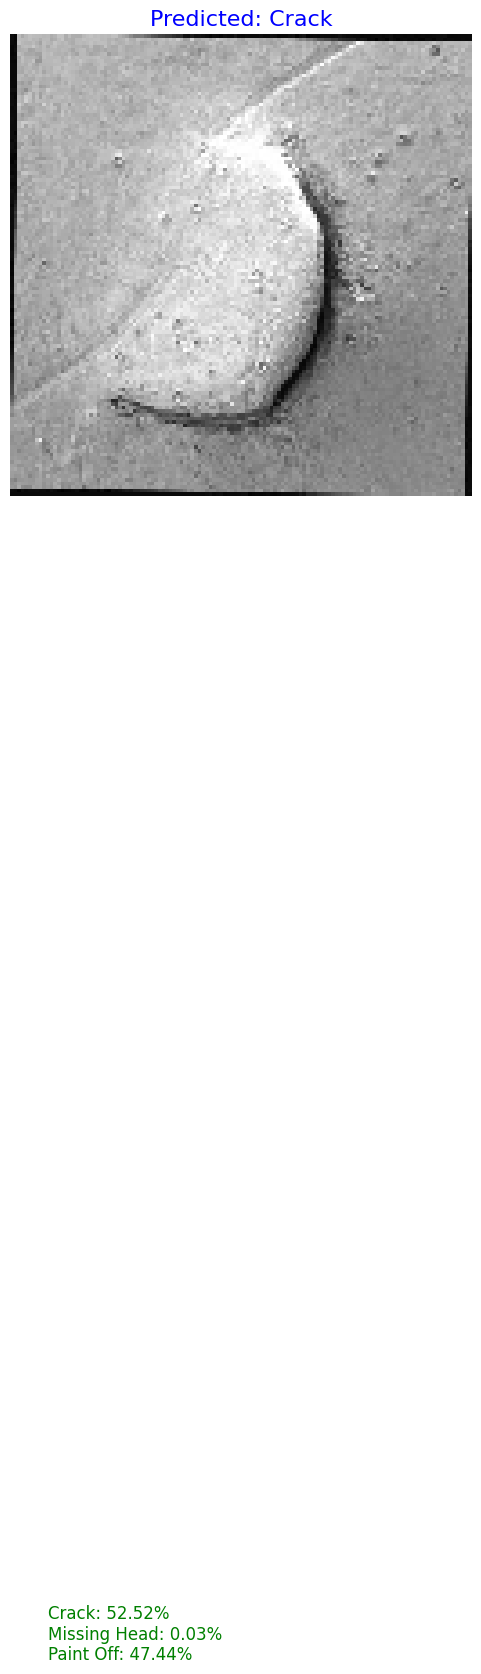

In [22]:
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the image
image_path = '/content/drive/MyDrive/aer 850/project 2/Data/test/crack/test_crack.jpg'  # Update with your desired image
image = load_img(image_path, target_size=(128, 128))  # Load and resize
image_array = img_to_array(image) / 255.0  # Normalize
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

# Step 2: Predict class probabilities
predictions = model.predict(image_array)
class_names = ['Crack', 'Missing Head', 'Paint Off']  # Update with actual class labels
predicted_label = class_names[np.argmax(predictions[0])]

# Step 3: Display the image with predictions
plt.figure(figsize=(6, 6))
plt.imshow(image)  # Show the image
plt.axis('off')
plt.title(f"Predicted: {predicted_label}", fontsize=16, color='blue')

# Add class probabilities as text on the image
prob_text = "\n".join([f"{class_names[i]}: {predictions[0][i]*100:.2f}%" for i in range(len(class_names))])
plt.text(10, 450, prob_text, fontsize=12, color='green')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


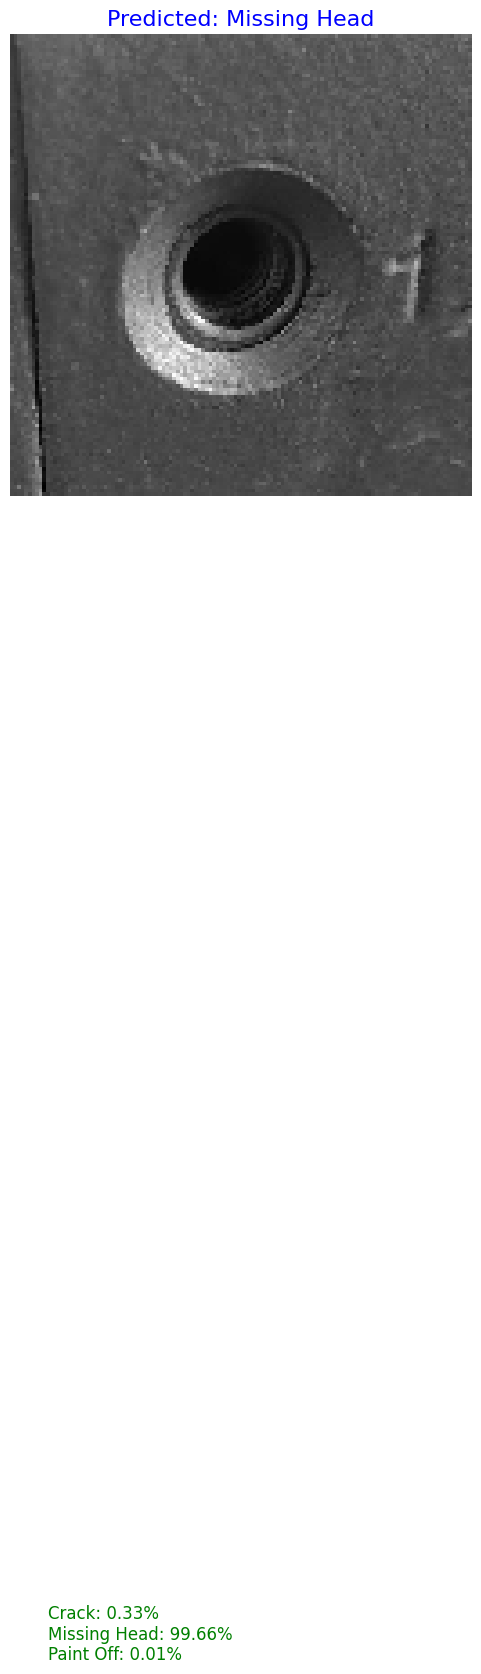

In [23]:
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the image
image_path = '/content/drive/MyDrive/aer 850/project 2/Data/test/missing-head/test_missinghead.jpg'  # Update with your desired image
image = load_img(image_path, target_size=(128, 128))  # Load and resize
image_array = img_to_array(image) / 255.0  # Normalize
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

# Step 2: Predict class probabilities
predictions = model.predict(image_array)
class_names = ['Crack', 'Missing Head', 'Paint Off']  # Update with actual class labels
predicted_label = class_names[np.argmax(predictions[0])]

# Step 3: Display the image with predictions
plt.figure(figsize=(6, 6))
plt.imshow(image)  # Show the image
plt.axis('off')
plt.title(f"Predicted: {predicted_label}", fontsize=16, color='blue')

# Add class probabilities as text on the image
prob_text = "\n".join([f"{class_names[i]}: {predictions[0][i]*100:.2f}%" for i in range(len(class_names))])
plt.text(10, 450, prob_text, fontsize=12, color='green')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


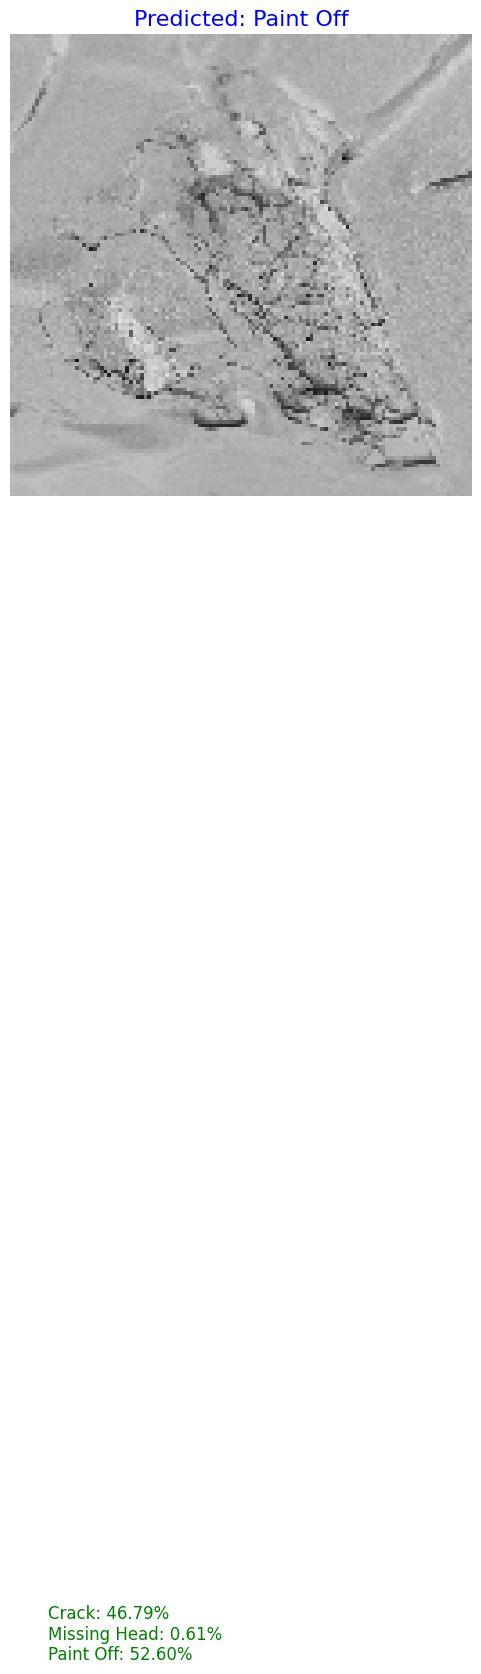

In [24]:
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the image
image_path = '/content/drive/MyDrive/aer 850/project 2/Data/test/paint-off/test_paintoff.jpg'  # Update with your desired image
image = load_img(image_path, target_size=(128, 128))  # Load and resize
image_array = img_to_array(image) / 255.0  # Normalize
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

# Step 2: Predict class probabilities
predictions = model.predict(image_array)
class_names = ['Crack', 'Missing Head', 'Paint Off']  # Update with actual class labels
predicted_label = class_names[np.argmax(predictions[0])]

# Step 3: Display the image with predictions
plt.figure(figsize=(6, 6))
plt.imshow(image)  # Show the image
plt.axis('off')
plt.title(f"Predicted: {predicted_label}", fontsize=16, color='blue')

# Add class probabilities as text on the image
prob_text = "\n".join([f"{class_names[i]}: {predictions[0][i]*100:.2f}%" for i in range(len(class_names))])
plt.text(10, 450, prob_text, fontsize=12, color='green')

plt.show()